In [1]:
import numpy as np
import polars as pl
from sympy import *
import scipy.interpolate as spi
import matplotlib.pyplot as plt

Construct a clamped cubic spline for the following data

In [2]:
x_vals = [-1, -0.5, 0, 0.5]
f_vals = [0.86199480, 0.95802009, 1.0986123, 1.2943767]
f_prime_vals = [0.15536240, 0.23269654, 0.33333333, 0.45186776]

In [3]:
vals = {"x": x_vals, "f(x)": f_vals, "f'(x)": f_prime_vals}
pl.DataFrame(vals, strict=False)

x,f(x),f'(x)
f64,f64,f64
-1.0,0.8619948,0.1553624
-0.5,0.95802,0.232697
0.0,1.0986123,0.333333
0.5,1.2943767,0.451868


In [4]:
cs = spi.CubicSpline(x=x_vals, 
                     y=f_vals, 
                     bc_type=((1, f_prime_vals[0]), (1, f_prime_vals[-1]))
                     )

In [5]:
a = cs.c[3, :]  
b = cs.c[2, :]  
c = cs.c[1, :]  
d = cs.c[0, :]  

for i in range(len(x_vals) - 1):
    print(f"S_{i}(x) = {a[i]} + {b[i]}*(x - {x_vals[i]}) + {c[i]}*(x - {x_vals[i]})^2 + {d[i]}*(x - {x_vals[i]})^3")
    print("")


S_0(x) = 0.8619948 + 0.1553624*(x - -1) + 0.06537407999999989*(x - -1)^2 + 0.0160045600000005*(x - -1)^3

S_1(x) = 0.95802009 + 0.23273990000000028*(x - -0.5) + 0.08938092000000053*(x - -0.5)^2 + 0.015016239999998682*(x - -0.5)^3

S_2(x) = 1.0986123 + 0.3333829999999998*(x - 0) + 0.11190527999999877*(x - 0)^2 + 0.008772640000001886*(x - 0)^3


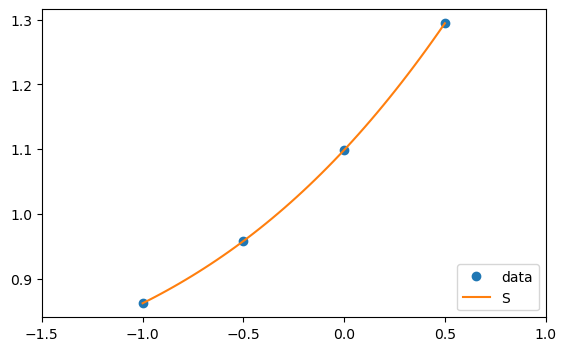

In [6]:
fig, ax = plt.subplots(figsize=(6.5, 4))

x_plot_vals = np.linspace(-1, 0.5)
ax.plot(x_vals, f_vals, 'o', label='data')
ax.plot(x_plot_vals, cs(x_plot_vals), label="S")
ax.set_xlim(-1.5, 1)
ax.legend(loc='lower right')
plt.show()